# Logistic Regression in Machine Learning 

* Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.
* Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.
* Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

Assumptions for Logistic Regression:
* The dependent variable must be categorical in nature.
* The independent variable should not have multi-collinearity.

Formula:
y = m1.x1+m2.x2+....+mn.xn+c


In [11]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
# Reading CSV files

df_demo = pd.read_csv('F:\MBA PVPSIT\MBA Final\Reliance Project\Excel Files\Reliance_Demographic.csv')

In [13]:
df_demo.head(10)

,Name,Age,Gender,Education,Occupation,Income,Digital_India_Awarness,Area
0,Yamijala Suryanarayana Murthy,27,1,4,2,302615,Yes,2
1,Mr.MARUSANI GOVARDHAN REDDY,32,1,3,2,556992,Yes,1
2,Deepthi,32,2,3,1,440355,Yes,1
3,Santhosh Kumar,36,1,2,1,494852,Yes,1
4,Purnima,35,2,2,1,208228,Yes,1
5,G.hima sri,35,2,2,1,238130,Yes,1
6,Amina Kausar,33,2,3,1,556992,Yes,2
7,Kuppiraju Navyakumari,31,2,3,1,346405,Yes,2
8,Gubbala Venkata Nagendra,32,1,3,1,556992,Yes,2
9,Tripuraneni Sai Hari Chandra prasad,36,1,3,1,307165,Yes,2


In [4]:
#df_demo.drop('Unnamed: 8',axis=1,inplace=True)

In [5]:
df_demo.head()

,Name,Age,Gender,Education,Occupation,Income,Digital_India_Awarness,Area
0,Yamijala Suryanarayana Murthy,27,1,4,2,302615,Yes,2
1,Mr.MARUSANI GOVARDHAN REDDY,32,1,3,2,556992,Yes,1
2,Deepthi,32,2,3,1,440355,Yes,1
3,Santhosh Kumar,36,1,2,1,494852,Yes,1
4,Purnima,35,2,2,1,208228,Yes,1


In [6]:
# Determining null values using for loop

for null in df_demo.columns:
    missing = np.mean(df_demo[null].isnull())
    print('{} - {}%'.format(null,missing))



Name - 0.0%
Age - 0.0%
Gender - 0.0%
Education - 0.0%
Occupation - 0.0%
Income - 0.0%
Digital_India_Awarness - 0.0%
Area - 0.0%


In [28]:
demo_update = df_demo.fillna(value = 0)

In [29]:
# Data Types
demo_update.dtypes

Name                      object
Age                        int64
Gender                     int64
Education                  int64
Occupation                 int64
Income                     int64
Digital_India_Awarness    object
Area                       int64
dtype: object

In [30]:
# Descriptive Statistics

demo_update['Income'].describe()

count    1.920000e+02
mean     4.544491e+05
std      3.234671e+05
min      2.019770e+05
25%      2.898540e+05
50%      4.089585e+05
75%      4.717330e+05
max      1.883250e+06
Name: Income, dtype: float64

In [31]:
# Change data type of columns

demo_update['Age'] = demo_update['Age'].astype('int64')

demo_update['Gender'] = demo_update['Gender'].astype('int64')

demo_update['Education'] = demo_update['Education'].astype('int64')

demo_update['Occupation'] = demo_update['Occupation'].astype('int64')

demo_update['Income'] = demo_update['Income'].astype('int64')

demo_update['Area'] = demo_update['Area'].astype('int64')

In [32]:
demo_update['Age'].describe()

count    192.000000
mean      25.416667
std        5.049839
min       18.000000
25%       22.000000
50%       25.000000
75%       28.000000
max       40.000000
Name: Age, dtype: float64

In [33]:
# Reading Products File

df_products = pd.read_csv('F:\MBA PVPSIT\MBA Final\Reliance Project\Excel Files\Reliance_Products.csv')
df_products.head(10)

,Name,Jio_Ecosystem_Awarness,Most_Preferred_Product,Product_Usage,Jio_Expense,Jio_TimeSpent
0,Yamijala Suryanarayana Murthy,Yes,Jio TV,Daily,Low,120
1,Mr.MARUSANI GOVARDHAN REDDY,Yes,Jio Telecom,Once a Week,Medium,180
2,Deepthi,Yes,Jio Saavn music,Once a Month,Low,60
3,Santhosh Kumar,Yes,Jio TV,Daily,Low,120
4,Purnima,Yes,Jio TV,Once a Month,Medium,120
5,G.hima sri,Yes,Jio TV,Daily,Medium,180
6,Amina Kausar,Yes,Jio Cinema,Twice a Month,Low,120
7,Kuppiraju Navyakumari,Yes,Jio Mart,Twice a Month,High,120
8,Gubbala Venkata Nagendra,Yes,Jio Telecom,Daily,Medium,240
9,Tripuraneni Sai Hari Chandra prasad,Yes,Jio Fiber Broadband Internet,Daily,Medium,180


In [34]:
for null in df_products.columns:
    missingP = np.mean(df_products[null].isnull())
    print(null,missingP)

Name 0.0
Jio_Ecosystem_Awarness 0.0
Most_Preferred_Product 0.0
Product_Usage 0.0
Jio_Expense 0.0
Jio_TimeSpent 0.0


In [35]:
# Reading Favourable Factors

df_favourable = pd.read_csv('F:\MBA PVPSIT\MBA Final\Reliance Project\Excel Files\Reliance_Favourable.csv')
df_favourable.head(8)

,Name,Infrastructure_4GNetwork,Offers_Reach,Quality_Of_Products,Tariff_Rates,Network_Portability,Online_Streaming,Easiness_Of_Apps,Easiness_Of_Payment_Systems,Penetration_Market_Ecosystem,Changing_View_Of_Shopping,Frequency_Of_Downloading,Affordable_Price_Rates,Strong_Push_Towards_Start-Up_Initiation,Broad_Range_Of_Services_Offered,App_Downloads_Frequency
0,Yamijala Suryanarayana Murthy,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0
1,Mr.MARUSANI GOVARDHAN REDDY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Deepthi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Santhosh Kumar,0,0,0,0,0,1,1,1,1,0,0,0,1,0,1
4,Purnima,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,G.hima sri,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Amina Kausar,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
7,Kuppiraju Navyakumari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
# Files Merged

demo_products = demo_update.merge(df_products,on='Name')

In [37]:
final = demo_products.merge(df_favourable,on='Name')

In [39]:
final.head(3)

,Name,Age,Gender,Education,Occupation,Income,Digital_India_Awarness,Area,Jio_Ecosystem_Awarness,Most_Preferred_Product,...,Online_Streaming,Easiness_Of_Apps,Easiness_Of_Payment_Systems,Penetration_Market_Ecosystem,Changing_View_Of_Shopping,Frequency_Of_Downloading,Affordable_Price_Rates,Strong_Push_Towards_Start-Up_Initiation,Broad_Range_Of_Services_Offered,App_Downloads_Frequency
0,Yamijala Suryanarayana Murthy,27,1,4,2,302615,Yes,2,Yes,Jio TV,...,0,1,0,1,0,1,0,0,0,0
1,Mr.MARUSANI GOVARDHAN REDDY,32,1,3,2,556992,Yes,1,Yes,Jio Telecom,...,0,0,0,0,0,0,0,0,0,0
2,Deepthi,32,2,3,1,440355,Yes,1,Yes,Jio Saavn music,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Identify duplicate data
np.mean(final.duplicated())

0.0380952380952381

In [20]:
Two = np.random.randint(1000000,2000000,16)
Two

array([1801679, 1755327, 1256978, 1634779, 1109002, 1566699, 1066409,
       1868637, 1056469, 1227485, 1923588, 1177175, 1633912, 1102968,
       1976134, 1868340])

In [21]:
Adult = np.random.randint(31,40,8)
Adult

array([37, 36, 32, 39, 36, 38, 37, 37])

In [22]:
Teen = np.random.randint(18,30,177)
Teen

array([20, 24, 29, 26, 27, 27, 22, 23, 18, 25, 21, 25, 25, 20, 21, 19, 26,
       22, 29, 26, 23, 23, 26, 20, 19, 20, 21, 23, 23, 26, 20, 28, 29, 26,
       27, 22, 20, 19, 18, 28, 26, 25, 29, 26, 28, 19, 20, 29, 24, 18, 26,
       27, 18, 24, 21, 25, 27, 19, 27, 21, 28, 22, 20, 21, 21, 24, 29, 29,
       28, 27, 28, 27, 18, 24, 20, 22, 29, 22, 25, 27, 29, 29, 23, 20, 28,
       19, 20, 19, 27, 23, 22, 25, 22, 26, 23, 19, 27, 27, 26, 20, 27, 25,
       22, 25, 24, 22, 20, 24, 29, 23, 18, 20, 21, 25, 22, 25, 27, 21, 20,
       29, 22, 19, 27, 21, 24, 20, 22, 24, 18, 21, 18, 23, 18, 21, 25, 27,
       26, 29, 28, 28, 23, 21, 24, 21, 24, 29, 19, 23, 28, 22, 25, 27, 22,
       20, 23, 29, 21, 23, 21, 18, 25, 20, 24, 22, 26, 28, 18, 21, 20, 27,
       21, 28, 25, 19, 27, 24, 28])

In [23]:
# Descriptive Statistics
final.describe()

,Age,Gender,Education,Occupation,Income,Area,Jio_TimeSpent,Infrastructure_4GNetwork,Offers_Reach,Quality_Of_Products,...,Online_Streaming,Easiness_Of_Apps,Easiness_Of_Payment_Systems,Penetration_Market_Ecosystem,Changing_View_Of_Shopping,Frequency_Of_Downloading,Affordable_Price_Rates,Strong_Push_Towards_Start-Up_Initiation,Broad_Range_Of_Services_Offered,App_Downloads_Frequency
count,210.000000,210.000000,210.000000,210.000000,2.100000e+02,210.000000,210.000000,210.000000,210.000000,210.000000,...,210.000000,210.000000,210.000000,210.000000,210.00000,210.00000,210.000000,210.000000,210.000000,210.000000
mean,25.209524,1.500000,2.533333,1.447619,4.439944e+05,1.680952,103.714286,0.028571,0.033333,0.033333,...,0.052381,0.028571,0.038095,0.028571,0.02381,0.02381,0.052381,0.042857,0.038095,0.061905
std,5.014229,0.501195,0.634972,0.633679,3.124062e+05,0.467221,62.327383,0.166997,0.179934,0.179934,...,0.223326,0.166997,0.191884,0.166997,0.15282,0.15282,0.223326,0.203019,0.191884,0.241558
min,18.000000,1.000000,1.000000,1.000000,2.019770e+05,1.000000,60.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1.000000,2.000000,1.000000,2.824265e+05,1.000000,60.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,1.500000,3.000000,1.000000,3.986730e+05,2.000000,60.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,27.750000,2.000000,3.000000,2.000000,4.682800e+05,2.000000,120.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
max,40.000000,2.000000,4.000000,4.000000,1.883250e+06,2.000000,240.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000


# Exploratory Data Analysis


In [24]:
final.columns

Index(['Name', 'Age', 'Gender', 'Education', 'Occupation', 'Income',
       'Digital_India_Awarness', 'Area', 'Jio_Ecosystem_Awarness',
       'Most_Preferred_Product', 'Product_Usage', 'Jio_Expense',
       'Jio_TimeSpent', 'Infrastructure_4GNetwork', 'Offers_Reach',
       'Quality_Of_Products', 'Tariff_Rates', 'Network_Portability',
       'Online_Streaming', 'Easiness_Of_Apps', 'Easiness_Of_Payment_Systems',
       'Penetration_Market_Ecosystem', 'Changing_View_Of_Shopping',
       'Frequency_Of_Downloading', 'Affordable_Price_Rates',
       'Strong_Push_Towards_Start-Up_Initiation',
       'Broad_Range_Of_Services_Offered', 'App_Downloads_Frequency'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

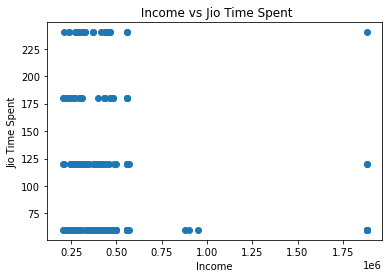

In [40]:
# Correlation between Income and Jio_TimeSpent

plt.scatter(x=final['Income'],y=final['Jio_TimeSpent'])
plt.title(' Income vs Jio Time Spent')
plt.xlabel('Income')
plt.ylabel('Jio Time Spent')
plt.show

<AxesSubplot:xlabel='Income', ylabel='Jio_TimeSpent'>

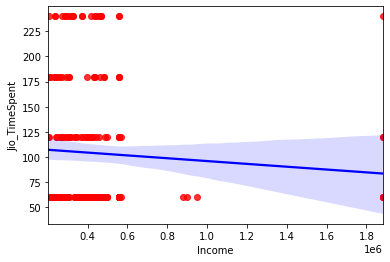

In [26]:
sns.regplot(x='Income',y='Jio_TimeSpent',data=final,scatter_kws={"color":"red"}, line_kws={"color":"blue"})

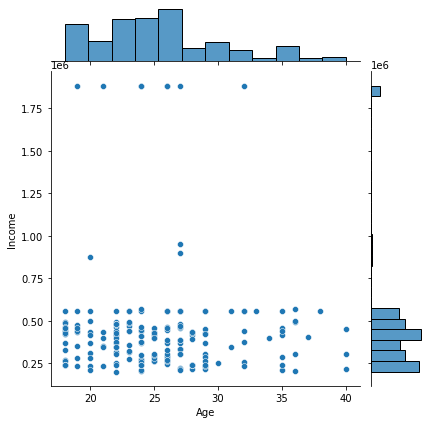

In [52]:
# Jointplot to show INCOME VS AGE
sns.jointplot(x='Age',y='Income',data=final)

In [87]:
final.columns

Index(['Name', 'Age', 'Gender', 'Education', 'Occupation', 'Income',
       'Digital_India_Awarness', 'Area', 'Jio_Ecosystem_Awarness',
       'Most_Preferred_Product', 'Product_Usage', 'Jio_Expense',
       'Jio_TimeSpent', 'Infrastructure_4GNetwork', 'Offers_Reach',
       'Quality_Of_Products', 'Tariff_Rates', 'Network_Portability',
       'Online_Streaming', 'Easiness_Of_Apps', 'Easiness_Of_Payment_Systems',
       'Penetration_Market_Ecosystem', 'Changing_View_Of_Shopping',
       'Frequency_Of_Downloading', 'Affordable_Price_Rates',
       'Strong_Push_Towards_Start-Up_Initiation',
       'Broad_Range_Of_Services_Offered', 'App_Downloads_Frequency'],
      dtype='object')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


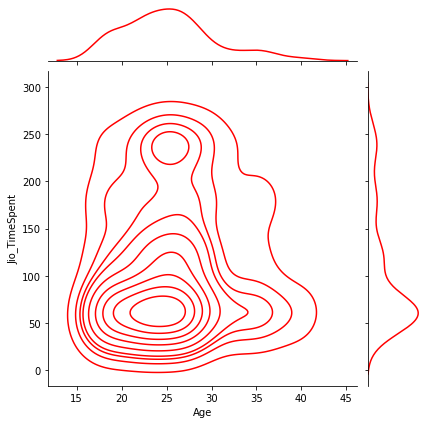

In [29]:
# Age vs Jio time spent in minutes
sns.jointplot('Age','Jio_TimeSpent',final,color='red',kind='kde')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


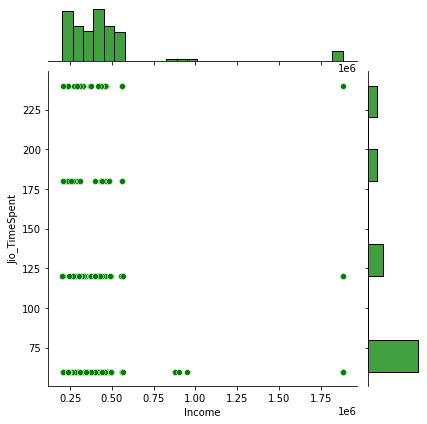

In [30]:
# Income vs Jio Time Spent
sns.jointplot('Income','Jio_TimeSpent',final,color='green')

# Logistic Regression - Machine Learning Algorithm

In [41]:
# Split the data into training sets and test sets.

from sklearn.model_selection import train_test_split

In [42]:
final.columns

Index(['Name', 'Age', 'Gender', 'Education', 'Occupation', 'Income',
       'Digital_India_Awarness', 'Area', 'Jio_Ecosystem_Awarness',
       'Most_Preferred_Product', 'Product_Usage', 'Jio_Expense',
       'Jio_TimeSpent', 'Infrastructure_4GNetwork', 'Offers_Reach',
       'Quality_Of_Products', 'Tariff_Rates', 'Network_Portability',
       'Online_Streaming', 'Easiness_Of_Apps', 'Easiness_Of_Payment_Systems',
       'Penetration_Market_Ecosystem', 'Changing_View_Of_Shopping',
       'Frequency_Of_Downloading', 'Affordable_Price_Rates',
       'Strong_Push_Towards_Start-Up_Initiation',
       'Broad_Range_Of_Services_Offered', 'App_Downloads_Frequency'],
      dtype='object')

In [148]:
# Declaring Variable assuming x as Independent Variable and y as Dependent Variable respectively.

x = final[['Age','Income','Gender', 'Education', 'Occupation']]
y = final['App_Downloads_Frequency']

In [149]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [150]:
#Train and fit a logistic regression model on the training set

from sklearn.linear_model import LogisticRegression

In [151]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

# Predictions and Evaluations - App_Downloads_Frequency

In [152]:
predictions = logmodel.predict(x_test)

In [153]:
# classification report for the model

from sklearn.metrics import classification_report, confusion_matrix

In [154]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        67
           1       0.00      0.00      0.00         3

    accuracy                           0.96        70
   macro avg       0.48      0.50      0.49        70
weighted avg       0.92      0.96      0.94        70

[[67  0]
 [ 3  0]]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Neutral Proportion

In [155]:
neutral = pd.read_csv('F:\MBA PVPSIT\MBA Final\Reliance Project\Excel Files\Reliance_Favourable_Neutral.csv')

In [156]:
# Merging demo, products and neutral files
neutral_final = demo_products.merge(neutral,on='Name')

In [157]:
neutral_final.columns

Index(['Name', 'Age', 'Gender', 'Education', 'Occupation', 'Income',
       'Digital_India_Awarness', 'Area', 'Jio_Ecosystem_Awarness',
       'Most_Preferred_Product', 'Product_Usage', 'Jio_Expense',
       'Jio_TimeSpent', 'Infrastructure_4GNetwork', 'Offers_Reach',
       'Quality_Of_Products', 'Tariff_Rates', 'Network_Portability',
       'Online_Streaming', 'Easiness_Of_Apps', 'Easiness_Of_Payment_Systems',
       'Penetration_Market_Ecosystem', 'Changing_View_Of_Shopping',
       'Frequency_Of_Downloading', 'Affordable_Price_Rates',
       'Strong_Push_Towards_Start-Up_Initiation',
       'Broad_Range_Of_Services_Offered', 'App_Downloads_Frequency'],
      dtype='object')

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
x = neutral_final[['Age','Income','Gender', 'Education', 'Occupation']]
y = neutral_final['Infrastructure_4GNetwork', 'Offers_Reach',
       'Quality_Of_Products', 'Tariff_Rates', 'Network_Portability',
       'Online_Streaming', 'Easiness_Of_Apps', 'Easiness_Of_Payment_Systems',
       'Penetration_Market_Ecosystem', 'Changing_View_Of_Shopping',
       'Frequency_Of_Downloading', 'Affordable_Price_Rates',
       'Strong_Push_Towards_Start-Up_Initiation',
       'Broad_Range_Of_Services_Offered', 'App_Downloads_Frequency']

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [161]:
from sklearn.linear_model import LogisticRegression

In [162]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [163]:
predictions = logmodel.predict(x_test)

In [164]:
from sklearn.metrics import classification_report, confusion_matrix

In [165]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.80      1.00      0.89        56

    accuracy                           0.80        70
   macro avg       0.40      0.50      0.44        70
weighted avg       0.64      0.80      0.71        70

[[ 0 14]
 [ 0 56]]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
